<a href="https://colab.research.google.com/github/nattyitaa/Learn-Python-in-2-hr/blob/main/Copy_of_27Jun2022_OpenCV_Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!unzip 'h.zip'

Archive:  h.zip
  inflating: h/Beautiful-River-Mountain-Landscape-Pics-Photos-Wallpapers-Images-Free-Download.jpg  
  inflating: h/NashPoint.jpg         
  inflating: h/OIP.jpg               
  inflating: h/Sunrise-landscape-photography-early-morning-swamp-evaporation-streaming-sky-Download-4k-wallpaper-images-for-your-desktop-background-1920x1200.jpg  
  inflating: h/th.jpg                


#**Image Transformations**

1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

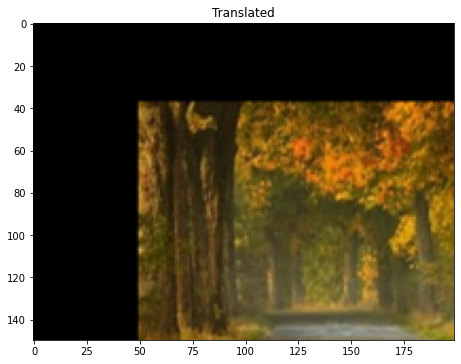

In [17]:
# Load our image
image = cv2.imread('/content/h/th.jpg')

# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [18]:
# What does T look like
print(T)

print(height, width )

[[ 1.    0.   49.75]
 [ 0.    1.   37.5 ]]
150 199


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


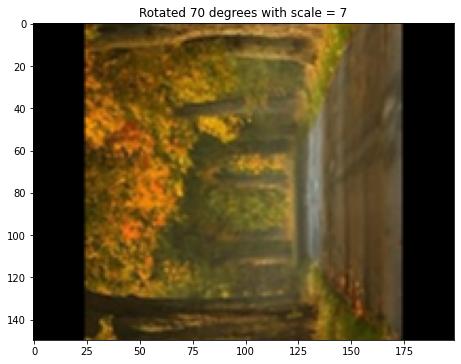

In [22]:
# Load our image
image = cv2.imread('/content/h/th.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 70 degrees with scale = 7", rotated_image)

[[ 3.061617e-17  5.000000e-01  6.200000e+01]
 [-5.000000e-01  3.061617e-17  1.247500e+02]]


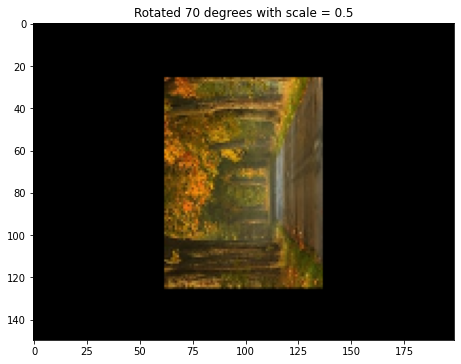

In [21]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 70 degrees with scale = 0.5", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)

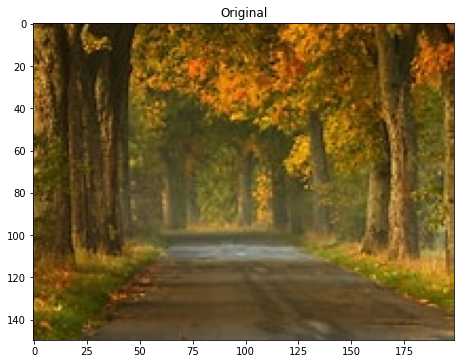

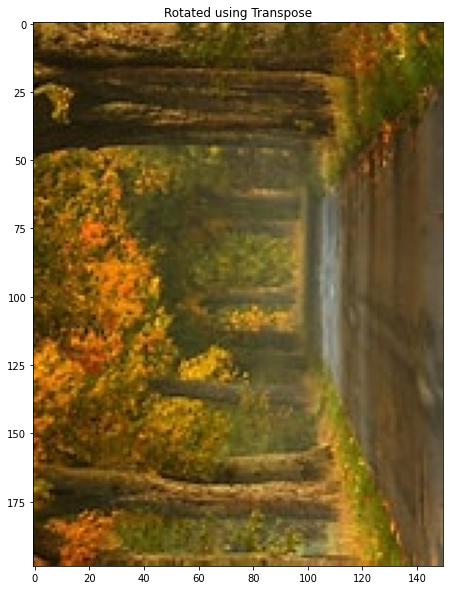

In [23]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

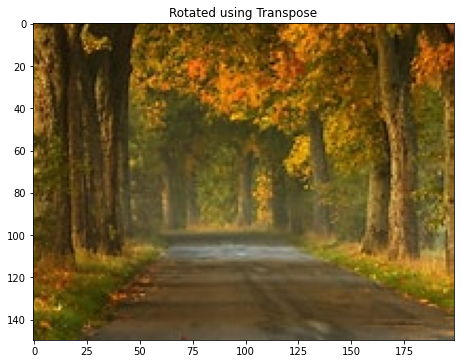

In [24]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

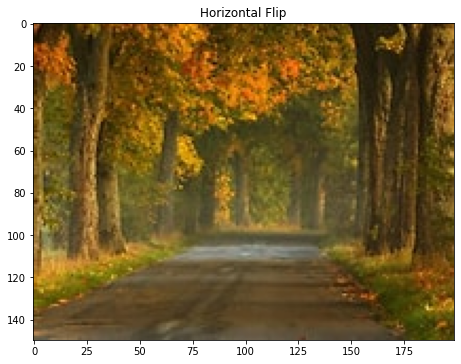

In [25]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)

# **Scaling, Re-sizing, Interpolations and Cropping**

1. How to re-size and scale images
2. Image Pyramids
3. Cropping

### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood

See more on their performance - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

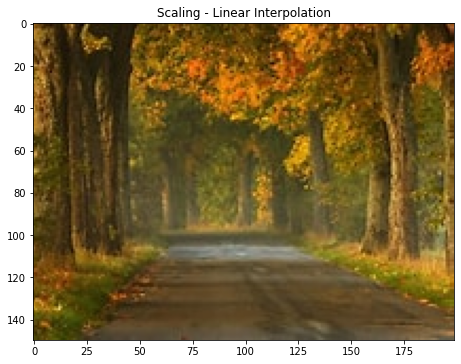

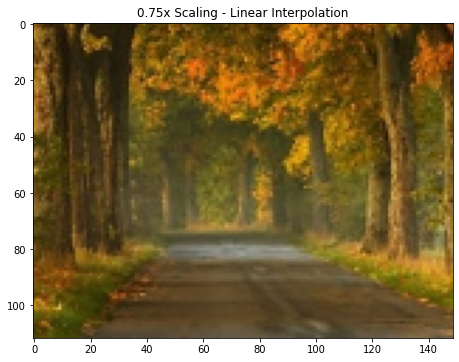

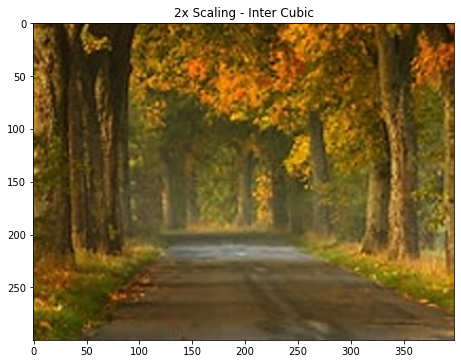

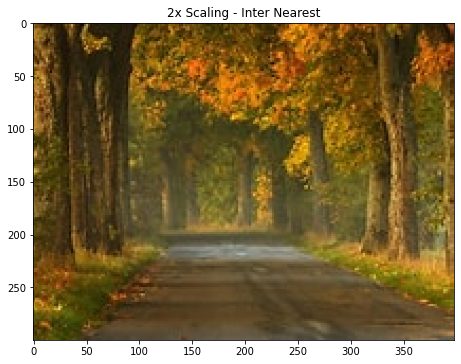

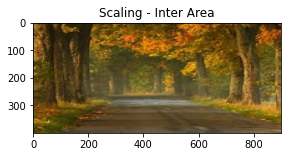

In [26]:
# load our input image
image = cv2.imread('/content/h/th.jpg')
imshow("Scaling - Linear Interpolation", image)

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

## **Image Pyraminds**

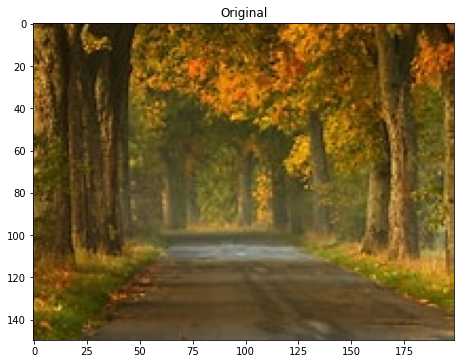

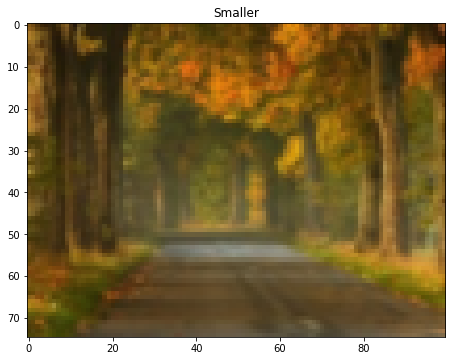

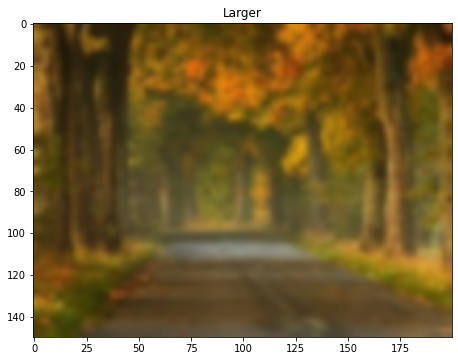

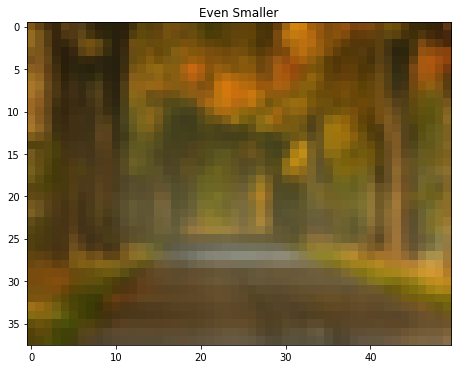

In [27]:
image = cv2.imread('/content/h/th.jpg')

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)

# **Cropping**

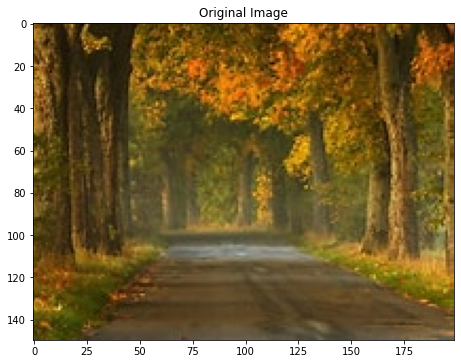

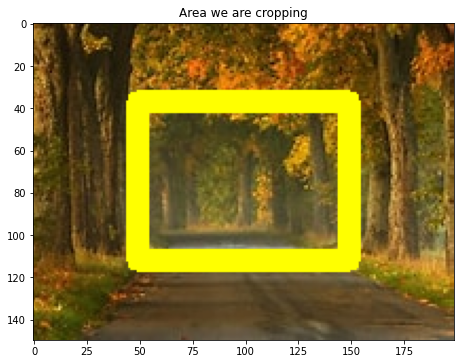

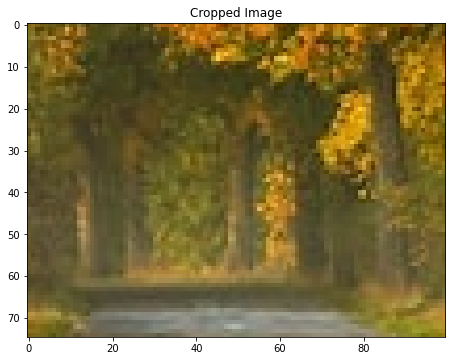

In [28]:
image = cv2.imread('/content/h/th.jpg')

# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

imshow("Original Image", image)

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are cropping", copy)

imshow("Cropped Image", cropped) 

# **Convolutions, Blurring and Sharpening Images**

1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

### **Blurring using Convolutions**

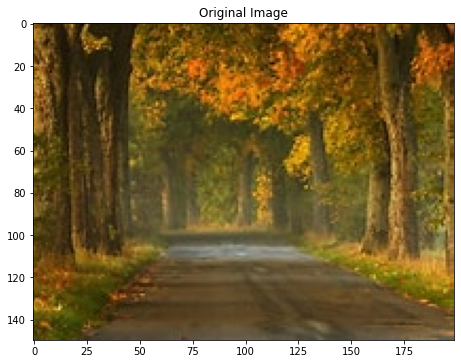

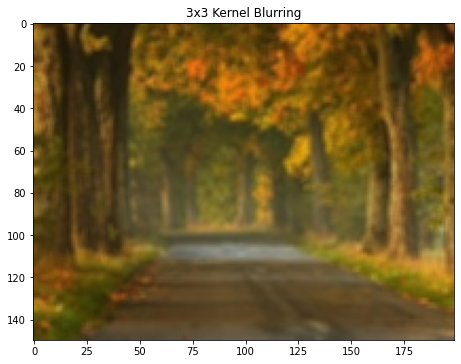

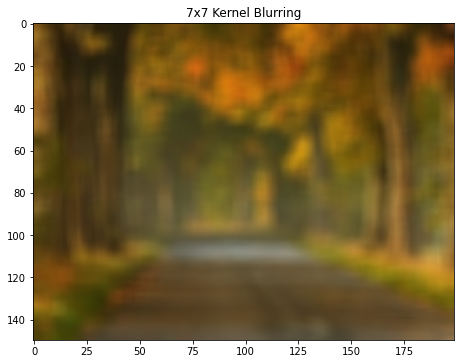

In [29]:
import cv2
import numpy as np

image = cv2.imread('/content/h/th.jpg')
imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

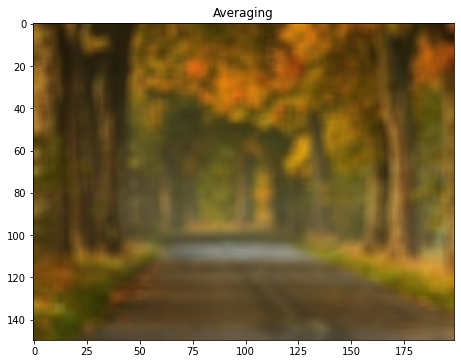

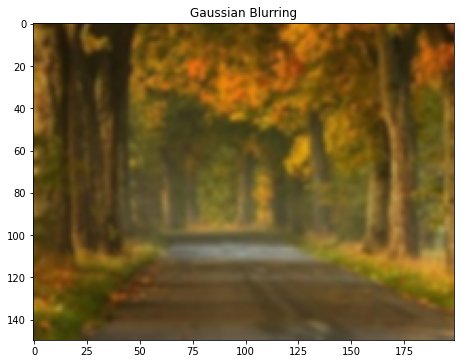

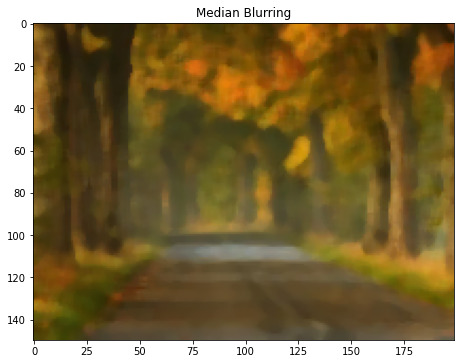

In [30]:
image = cv2.imread('/content/h/th.jpg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

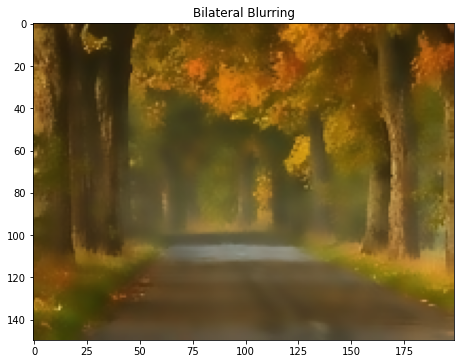

In [31]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:	

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

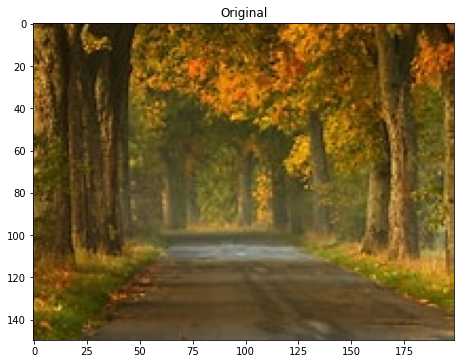

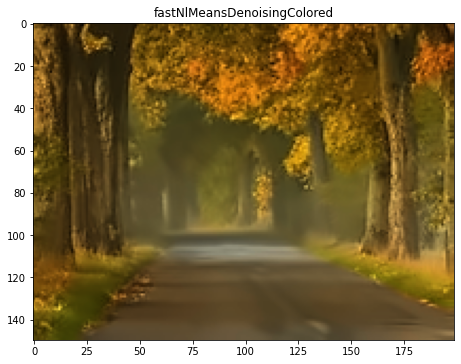

In [32]:
image = cv2.imread('/content/h/th.jpg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

### **Sharpening Images**

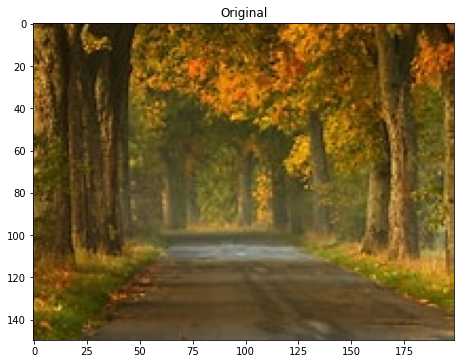

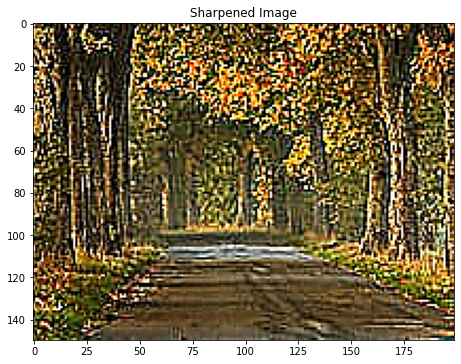

In [33]:
# Loading our image
image = cv2.imread('/content/h/th.jpg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)

###End of Code